In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Example star
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]

In [3]:
# Initialize a jam session with a single star
jam_sess = session(ID = kic, numax = [numax], dnu = [dnu], teff = [teff], kwargs = {'quarter': 5})

# Initialize a jam sessing with more than one star
jam_sess = session(ID = [kic,kic], numax = [numax,numax], dnu = [dnu,dnu], teff = [teff,teff], kwargs = {'quarter': [5,5]})

In [4]:
# Result is always a list of star class instances
# Taking the first one as an example
star = jam_sess.stars[0]

In [5]:
# Do mode ID for one of the stars using the asymptotic method on 7 radial orders
star.asymptotic_modeid(norders = 7)
# TODO - number of radial orders should be decided by the data, not the user

Burningham
Sampling


In [6]:
# Result is a dataframe
print(star.mode_ID)

    ell       nu_mu    nu_std
0     2  157.530086  0.362103
1     0  159.747472  0.360176
2     2  174.092765  0.306108
3     0  176.312767  0.299327
4     2  190.794907  0.291874
5     0  193.012045  0.282125
6     2  207.629400  0.291326
7     0  209.842917  0.281082
8     2  224.590420  0.289698
9     0  226.805022  0.281100
10    2  241.681110  0.292290
11    0  243.896984  0.287582
12    2  258.899737  0.323066
13    0  261.113682  0.324103


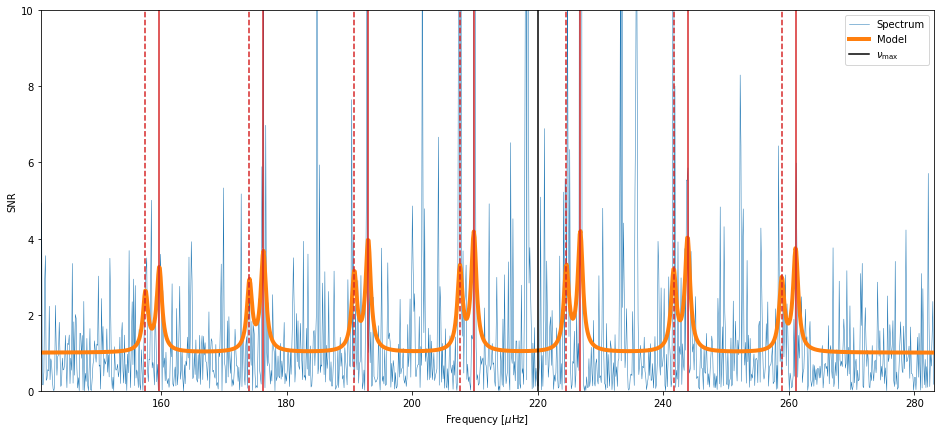

In [7]:
# Plot resulting spectrum model
mod_f, mod_s = star.asy_model

fig, ax = plt.subplots(figsize = (16,7))
ax.set_xlim(min(mod_f), max(mod_f))
ax.set_ylim(0, 10)
ax.plot(star.f, star.s, lw = 0.5, label = 'Spectrum')
ax.plot(mod_f, mod_s, label = 'Model', lw = 4)
ax.set_xlabel('Frequency [$\mu$Hz]')
ax.set_ylabel('SNR')
for i in range(len(star.mode_ID)):
    if star.mode_ID['ell'][i] == 0:
        ls = '-'
    else:
        ls = '--'
    ax.axvline(star.mode_ID['nu_mu'][i], color = 'C3', ls = ls)
ax.axvline(numax[0], color = 'k', label = r'$\nu_{\mathrm{max}}$')
ax.legend()